In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
traffic_df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
# Rain predicting traffic volume
X = traffic_df['rain_1h'].to_numpy()
Y = traffic_df['traffic_volume'].to_numpy()

X = X.reshape(-1, 1) 
Y = Y.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

rain_reg = LinearRegression().fit(X_train, Y_train)

In [4]:
print("Training error is:", mean_squared_error(Y_train, rain_reg.predict(X_train)))
print("Testing error is:", mean_squared_error(Y_test, rain_reg.predict(X_test)))
print("Rain Model: Traffic Volume = {}rain_1h + {}".format(rain_reg.coef_[0][0], rain_reg.intercept_[0]))

Training error is: 3956610.249010247
Testing error is: 3910794.3881500233
Rain Model: Traffic Volume = 0.2094728470486768rain_1h + 3260.8285424937008


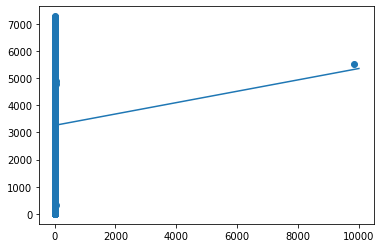

In [5]:
x_graph = np.linspace(0, 10000)
y_graph = rain_reg.coef_[0][0] * x_graph + rain_reg.intercept_[0]
plt.scatter(X, Y)
plt.plot(x_graph, y_graph)
plt.show()